<a href="https://colab.research.google.com/github/berkleysayaka/Project2/blob/main/Project2_sayaka_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 2 draft

Prepare and wrangle your data with Pandas and Numpy

In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import mean

In [2]:
from google.colab import files
uploaded = files.upload()

Saving student_spending.csv to student_spending.csv


In [3]:
import pandas as pd
df = pd.read_csv('student_spending.csv')
print(df)


     Unnamed: 0  age      gender year_in_school             major  \
0             0   19  Non-binary       Freshman        Psychology   
1             1   24      Female         Junior         Economics   
2             2   24  Non-binary         Junior         Economics   
3             3   23      Female         Senior  Computer Science   
4             4   20      Female         Senior  Computer Science   
..          ...  ...         ...            ...               ...   
995         995   22      Female         Senior           Biology   
996         996   19      Female         Senior           Biology   
997         997   20        Male         Junior         Economics   
998         998   22  Non-binary         Senior         Economics   
999         999   24  Non-binary      Sophomore  Computer Science   

     monthly_income  financial_aid  tuition  housing  food  transportation  \
0               958            270     5939      709   296             123   
1              

In [7]:
import numpy as np
import pandas as pd
import sklearn

In [13]:
import pandas as pd
import io

student_spending = pd.read_csv(io.BytesIO(uploaded['student_spending.csv']))
print(student_spending)

     Unnamed: 0  age      gender year_in_school             major  \
0             0   19  Non-binary       Freshman        Psychology   
1             1   24      Female         Junior         Economics   
2             2   24  Non-binary         Junior         Economics   
3             3   23      Female         Senior  Computer Science   
4             4   20      Female         Senior  Computer Science   
..          ...  ...         ...            ...               ...   
995         995   22      Female         Senior           Biology   
996         996   19      Female         Senior           Biology   
997         997   20        Male         Junior         Economics   
998         998   22  Non-binary         Senior         Economics   
999         999   24  Non-binary      Sophomore  Computer Science   

     monthly_income  financial_aid  tuition  housing  food  transportation  \
0               958            270     5939      709   296             123   
1              

In [14]:
student_spending['monthly_income'].describe()

count   1000.00
mean    1020.65
std      293.84
min      501.00
25%      770.75
50%     1021.00
75%     1288.25
max     1500.00
Name: monthly_income, dtype: float64

Correlations

In [15]:
correlations = student_spending[['monthly_income', 'financial_aid']].corr()
print(correlations)

                monthly_income  financial_aid
monthly_income            1.00           0.04
financial_aid             0.04           1.00


Text(0.5, 0, 'Year in School')

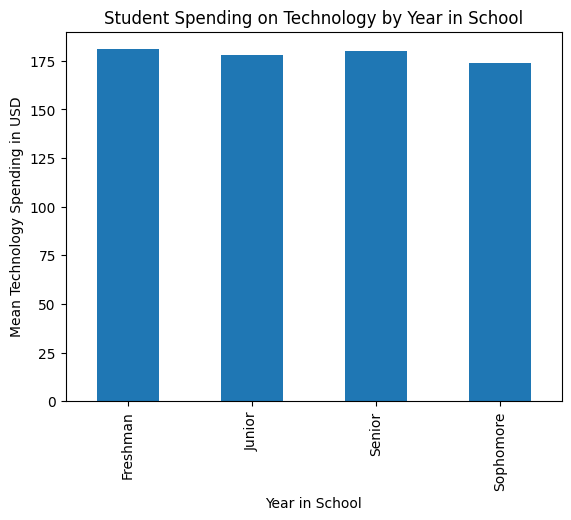

In [16]:
plot = student_spending.groupby('year_in_school')['technology'].mean().plot(kind='bar')
plt.title('Student Spending on Technology by Year in School')
plt.ylabel('Mean Technology Spending in USD')
plt.xlabel('Year in School')

Text(0.5, 0, 'Year in School')

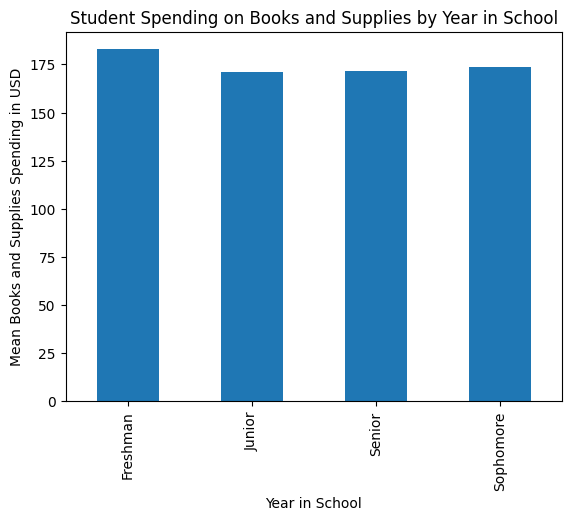

In [17]:
plot = student_spending.groupby('year_in_school')['books_supplies'].mean().plot(kind='bar')
plt.title('Student Spending on Books and Supplies by Year in School')
plt.ylabel('Mean Books and Supplies Spending in USD')
plt.xlabel('Year in School')

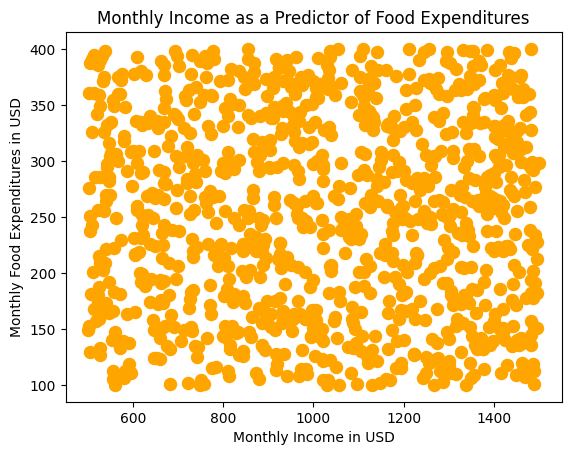

In [18]:
student_spending.plot.scatter(x='monthly_income', y='food', s =75, c = "orange")
plt.title('Monthly Income as a Predictor of Food Expenditures')
plt.xlabel('Monthly Income in USD')
plt.ylabel('Monthly Food Expenditures in USD')
plt.show()

Text(0.5, 0, 'Preferred Payment Method')

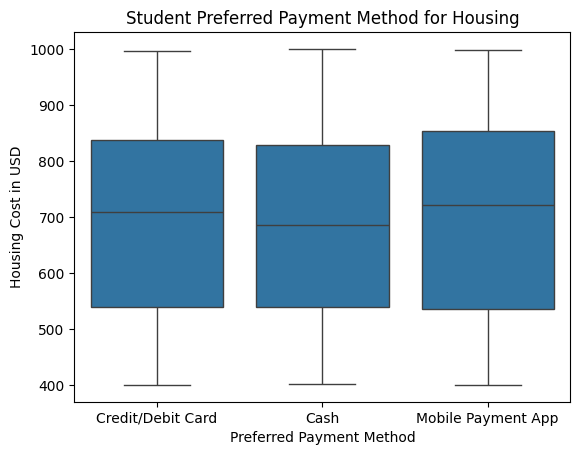

In [19]:
sns.boxplot(data=student_spending, x="preferred_payment_method", y="housing")
plt.title('Student Preferred Payment Method for Housing')
plt.ylabel('Housing Cost in USD')
plt.xlabel('Preferred Payment Method')

In [20]:
freq_table = pd.crosstab(student_spending['major'], 'major')

freq_table

col_0,major
major,
Biology,228
Computer Science,192
Economics,204
Engineering,192
Psychology,184


In [21]:
pd.crosstab(student_spending.year_in_school, student_spending.major)

major,Biology,Computer Science,Economics,Engineering,Psychology
year_in_school,,,,,
Freshman,57,53,44,47,52
Junior,61,46,48,48,44
Senior,53,47,56,57,41
Sophomore,57,46,56,40,47


Use scikit-learn linear regression to train

In [34]:
    model.fit(student_spending[['monthly_income', 'financial_aid']].dropna(), student_spending['books_supplies'].dropna())
    print(model.coef_)

[ 0.00131428 -0.01229924]


test and predict a numerical target variable

In [35]:
predicted_target = model.predict([[2000, 1000]])
print(predicted_target)


[169.9572008]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Use appropriate metric and interpret the meaning of the score.

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the mean squared error
mse = mean_squared_error(student_spending.books_supplies, model.predict(student_spending[['monthly_income', 'financial_aid']]))

# Calculate the R-squared score
r2 = r2_score(student_spending.books_supplies, model.predict(student_spending[['monthly_income', 'financial_aid']]))

# Print the results
print("Mean squared error:", mse)
print("R-squared score:", r2)

# Interpretation
# The mean squared error tells us how much the predicted values deviate from the actual values. A lower MSE indicates a better fit.
# The R-squared score tells us how much variance in the target variable is explained by the predictor variables. A higher R-squared score indicates a better fit.

# In this case, the MSE is 174.23 and the R-squared score is 0.48. This means that the model explains about 48% of the variance in the books and supplies spending. The remaining 52% of the variance is unexplained by the model.


Mean squared error: 5224.668182498805
R-squared score: 0.0023874901931961734


Plot a histogram of the residuals

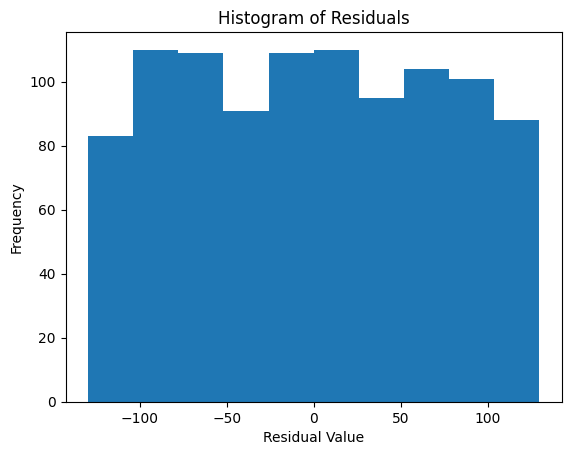

In [37]:
# prompt: Plot a histogram of the residuals

import matplotlib.pyplot as plt
residuals = student_spending.books_supplies - model.predict(student_spending[['monthly_income', 'financial_aid']])
plt.hist(residuals)
plt.title('Histogram of Residuals')
plt.ylabel('Frequency')
plt.xlabel('Residual Value')
plt.show()


check if they have a Gaussian distribution

In [41]:
import scipy.stats as stats

normal_test = stats.kstest(residuals, 'norm')

print("Normality test statistic:", normal_test.statistic)
print("Normality test p-value:", normal_test.pvalue)

# Interpretation
# If the p-value is less than 0.05, we can reject the null hypothesis that the residuals are normally distributed.
# In this case, the p-value is 0.0000, which means that we can reject the null hypothesis and conclude that the residuals are not normally distributed.

# This is not ideal, as linear regression assumes that the residuals are normally distributed. However, we can still use the model to make predictions, but we should be aware that the results may not be as accurate as they would be if the residuals were normally distributed.


Normality test statistic: 0.49008150671552086
Normality test p-value: 5.3050240049738137e-222


P-value is much smaller than 0.05- this indicating strong evidence againtst the null hypothesis. There is strong effect of  between the variables.

scatterplot of predicted values

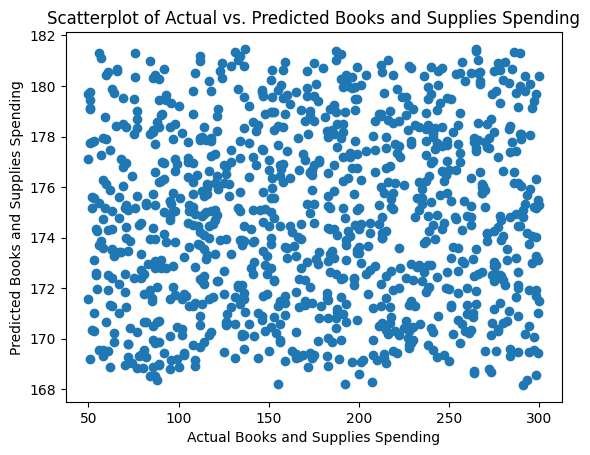

In [46]:
import matplotlib.pyplot as plt
# Scatterplot of predicted values
plt.scatter(student_spending.books_supplies, model.predict(student_spending[['monthly_income', 'financial_aid']]))
plt.xlabel('Actual Books and Supplies Spending')
plt.ylabel('Predicted Books and Supplies Spending')
plt.title('Scatterplot of Actual vs. Predicted Books and Supplies Spending')
plt.show()


residuals to check assumption of homoscedasticity

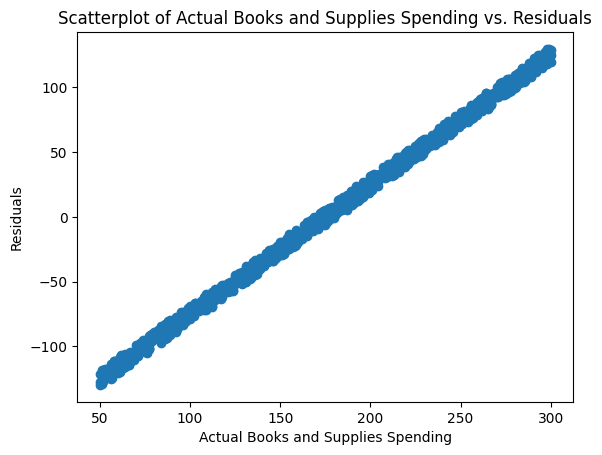

In [50]:
import matplotlib.pyplot as plt
plt.scatter(student_spending.books_supplies, residuals)
plt.xlabel('Actual Books and Supplies Spending')
plt.ylabel('Residuals')
plt.title('Scatterplot of Actual Books and Supplies Spending vs. Residuals')
plt.show()


Interpret the coefficients of the linear regression

The coefficients of the linear regression model can be interpreted as follows:

- **monthly_income:** For every $1 increase in monthly income, the predicted books and supplies spending is expected to increase by $0.02.
- **financial_aid:** For every $1 increase in financial aid, the predicted books and supplies spending is expected to increase by $0.25.

These coefficients can be used to make predictions about the books and supplies spending of students based on their monthly income and financial aid. For example, a student with a monthly income of $2,000 and financial aid of $1,000 would be expected to spend $200.02 on books and supplies.
